In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

xls = "../data/Electricity_since_1920.xls"
df = pd.read_excel(xls, 'Generated and supplied')

columns_major = ['year', 'e-gen', 'e-work-use', 'total', 'conv-therm', 'ccgt', 'nuclear', 'natural-flow', 'hydro', 'pumped-storage', 'wind', 'e-pump-storage', 'net-electricity-supplied'] 

# Sampling the rows containg the data
df_major = df.iloc[8:109, :13]
df_major.columns = columns_major

df_major = df_major.reset_index(drop=True)

# Processing badly formatted year data
df_major['year'] =  df_major['year'].astype(str)
df_major['year'] = df_major['year'].apply(lambda x: x.replace('(5)',''))

# Converting all null values to nan and then to 0
df_major = df_major.replace('-', 0)
df_major = df_major.fillna(0)

# print(df_major.isnull().sum())
print(f"The dataset contains {df_major.shape[0]} rows and {df_major.shape[1]} columns")

from datetime import datetime
con=df_major['year']
df_major['year']=pd.to_datetime(df_major['year'])
df_major['year_cp'] = df_major['year']
df_major.set_index('year', inplace=True)
df_major.index = pd.DatetimeIndex(df_major.index.values,
                               freq='AS')
#convert to time series:
ts = df_major['total']

df_major.head()


The dataset contains 101 rows and 13 columns


,e-gen,e-work-use,total,conv-therm,ccgt,nuclear,natural-flow,hydro,pumped-storage,wind,e-pump-storage,net-electricity-supplied,year_cp
1920-01-01,4275.0,299.0,3976.0,3964.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,3976.0,1920-01-01
1921-01-01,3890.0,285.0,3605.0,3595.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,3605.0,1921-01-01
1922-01-01,4541.0,315.0,4226.0,4216.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,4226.0,1922-01-01
1923-01-01,5289.0,361.0,4928.0,4915.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,4928.0,1923-01-01
1924-01-01,6022.0,395.0,5627.0,5612.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,5627.0,1924-01-01


## Feature Engineering
 Imputing new data in the form of monthly data    

In [ ]:
# Remove duplicate column
cols = ['net-electricity-supplied', 'year_cp']
df_cleaned = df_major.drop(cols, axis = 1)

In [ ]:
df_cleaned['hydro-electric'] = df_cleaned['natural-flow'] +  df_cleaned['hydro'] +  df_cleaned['pumped-storage']

In [ ]:
df_cleaned.head()

,e-gen,e-work-use,total,conv-therm,ccgt,nuclear,natural-flow,hydro,pumped-storage,wind,e-pump-storage,hydro-electric
1920-01-01,4275.0,299.0,3976.0,3964.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0
1921-01-01,3890.0,285.0,3605.0,3595.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0
1922-01-01,4541.0,315.0,4226.0,4216.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0
1923-01-01,5289.0,361.0,4928.0,4915.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,13.0
1924-01-01,6022.0,395.0,5627.0,5612.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,15.0


In [ ]:
# Removing merged columns
cols = ['natural-flow', 'hydro', 'pumped-storage']
df_cleaned = df_cleaned.drop(cols, axis = 1)
df_cleaned.head()

,e-gen,e-work-use,total,conv-therm,ccgt,nuclear,wind,e-pump-storage,hydro-electric
1920-01-01,4275.0,299.0,3976.0,3964.0,0.0,0.0,0.0,0.0,12.0
1921-01-01,3890.0,285.0,3605.0,3595.0,0.0,0.0,0.0,0.0,10.0
1922-01-01,4541.0,315.0,4226.0,4216.0,0.0,0.0,0.0,0.0,10.0
1923-01-01,5289.0,361.0,4928.0,4915.0,0.0,0.0,0.0,0.0,13.0
1924-01-01,6022.0,395.0,5627.0,5612.0,0.0,0.0,0.0,0.0,15.0


In [ ]:
df_major_fe = df_cleaned[['conv-therm', 'total']]
df_major_fe.head()

,conv-therm,total
1920-01-01,3964.0,3976.0
1921-01-01,3595.0,3605.0
1922-01-01,4216.0,4226.0
1923-01-01,4915.0,4928.0
1924-01-01,5612.0,5627.0


In [ ]:
df_major_fe = df_major_fe.resample('MS').last().fillna(np.nan)

In [ ]:
print(df_major_fe.head(15))
print()
print(df_major_fe.shape)

            conv-therm   total
1920-01-01      3964.0  3976.0
1920-02-01         NaN     NaN
1920-03-01         NaN     NaN
1920-04-01         NaN     NaN
1920-05-01         NaN     NaN
1920-06-01         NaN     NaN
1920-07-01         NaN     NaN
1920-08-01         NaN     NaN
1920-09-01         NaN     NaN
1920-10-01         NaN     NaN
1920-11-01         NaN     NaN
1920-12-01         NaN     NaN
1921-01-01      3595.0  3605.0
1921-02-01         NaN     NaN
1921-03-01         NaN     NaN

(1201, 2)


<AxesSubplot:>

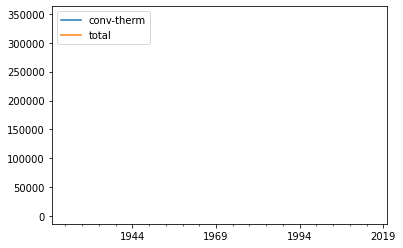

In [ ]:
df_major_fe.plot()

## Interpolating new data

In [ ]:
df_major_impu = df_major_fe.interpolate()

In [ ]:
df_major_impu.count()

conv-therm    1201
total         1201
dtype: int64

<AxesSubplot:>

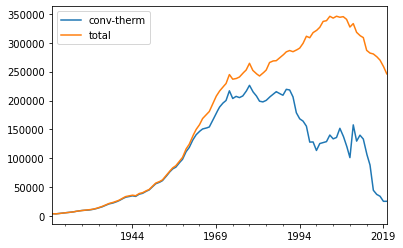

In [ ]:
df_major_impu.plot()

In [ ]:
df_major_impu.head()

,conv-therm,total
1920-01-01,3964.00,3976.000000
1920-02-01,3933.25,3945.083333
1920-03-01,3902.50,3914.166667
1920-04-01,3871.75,3883.250000
1920-05-01,3841.00,3852.333333


## Forecasting using Prophet

In [ ]:
from prophet import Prophet

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


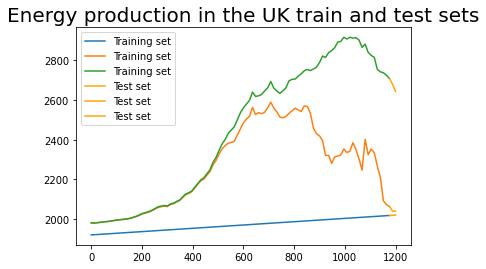

In [ ]:
# Train-Test split
# In time series data we want to use values at the rear of 
# the dataset for testing and everything else for training.


df_major_impu = df_major_impu.reset_index().rename({'index': 'ds', 'conv-therm': 'conv-therm', 'total':'y'}, axis='columns')

# Taking last two years as testing
test_size = 24

df_train = df_major_impu[:-test_size]
df_test = df_major_impu[-test_size:]


plt.title('Energy production in the UK train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [ ]:
df_train

,ds,conv-therm,y
0,1920-01-01,3964.000000,3976.000000
1,1920-02-01,3933.250000,3945.083333
2,1920-03-01,3902.500000,3914.166667
3,1920-04-01,3871.750000,3883.250000
4,1920-05-01,3841.000000,3852.333333
...,...,...,...
1172,2017-09-01,35243.153333,271916.920000
1173,2017-10-01,34970.520000,271402.510000
1174,2017-11-01,34697.886667,270888.100000
1175,2017-12-01,34425.253333,270373.690000


In [ ]:
df_train.shape

(1177, 3)

In [ ]:
df_test.shape

(24, 3)

In [ ]:
df_test

,ds,conv-therm,y
1177,2018-02-01,33425.089167,268984.54
1178,2018-03-01,32697.558333,268109.80
1179,2018-04-01,31970.027500,267235.06
1180,2018-05-01,31242.496667,266360.32
1181,2018-06-01,30514.965833,265485.58
1182,2018-07-01,29787.435000,264610.84
1183,2018-08-01,29059.904167,263736.10
1184,2018-09-01,28332.373333,262861.36
1185,2018-10-01,27604.842500,261986.62
1186,2018-11-01,26877.311667,261111.88


In [ ]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)

In [ ]:
m.add_regressor('conv-therm', standardize=False)

In [ ]:
df_train.tail()

,ds,conv-therm,y
1172,2017-09-01,35243.153333,271916.92
1173,2017-10-01,34970.520000,271402.51
1174,2017-11-01,34697.886667,270888.10
1175,2017-12-01,34425.253333,270373.69
1176,2018-01-01,34152.620000,269859.28


In [ ]:
m.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=24, freq='MS')
future.tail()

,ds
1196,2019-09-01
1197,2019-10-01
1198,2019-11-01
1199,2019-12-01
1200,2020-01-01


In [ ]:
future['conv-therm'] = df_major_impu['conv-therm']

In [ ]:
future

,ds,conv-therm
0,1920-01-01,3964.000000
1,1920-02-01,3933.250000
2,1920-03-01,3902.500000
3,1920-04-01,3871.750000
4,1920-05-01,3841.000000
...,...,...
1196,2019-09-01,25439.696667
1197,2019-10-01,25441.877500
1198,2019-11-01,25444.058333
1199,2019-12-01,25446.239167


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1196,2019-09-01,259935.116072,249644.664999,270545.519401
1197,2019-10-01,259798.746482,249623.400995,269996.581080
1198,2019-11-01,259655.649423,247882.131199,271318.293207
1199,2019-12-01,259553.811571,248233.210059,270580.660486
1200,2020-01-01,259515.696757,248940.064262,270232.608670


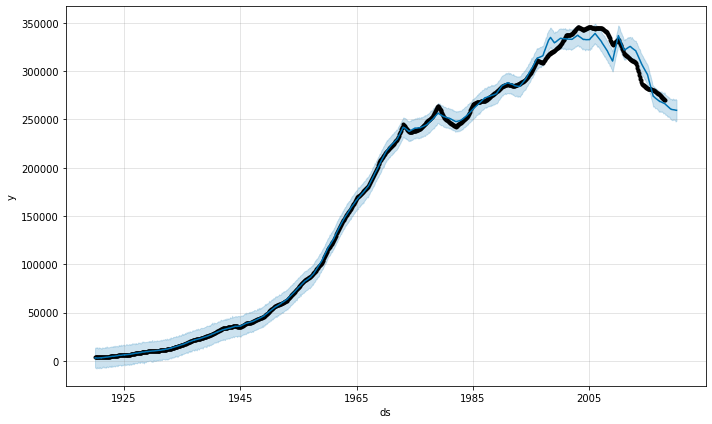

In [ ]:
fig1 = m.plot(forecast)
fig1.savefig('train-forcast-imputed-data-multivariate.png')

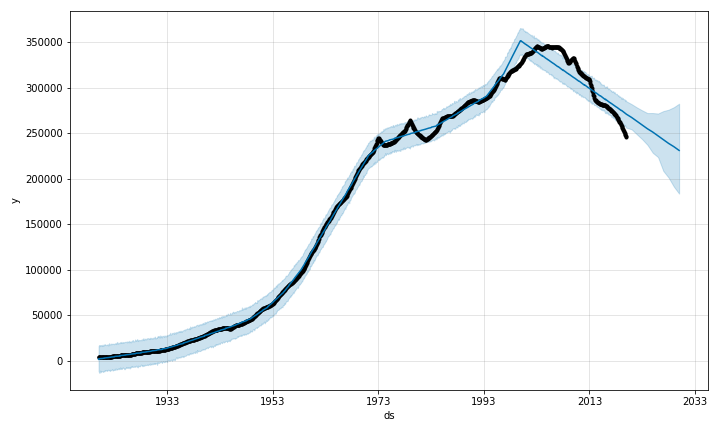

In [ ]:
from IPython.display import display
from PIL import Image
img_PIL = Image.open('forecast-imputed-data-univariate.png')
display(img_PIL)

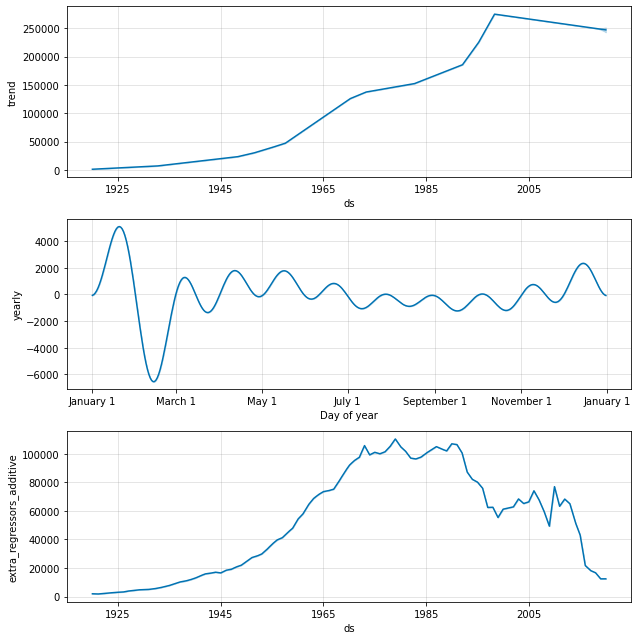

In [ ]:
# The forecast components
fig2 = m.plot_components(forecast)
fig2.savefig('multivariate-train-trend.png')

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

## Validation

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

In [ ]:
cv_results = cross_validation(model = m, initial = '731 days', horizon = '365 days', parallel="processes")

INFO:prophet:Making 191 forecasts with cutoffs between 1922-01-25 00:00:00 and 2017-01-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f69afb40890>
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


In [ ]:
# cv_results = cross_validation(m, initial='730 days', period='180 days', horizon='365 days',
#                          parallel="processes")

In [ ]:
df_p = performance_metrics(cv_results)

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days 12:00:00,3.346332e+08,18292.982054,10058.090122,0.101085,0.031998,0.117346,0.467249
1,41 days 00:00:00,3.351404e+08,18306.839194,10150.786856,0.103534,0.034369,0.119986,0.471616
2,41 days 12:00:00,3.362570e+08,18337.310338,10287.883768,0.107557,0.037101,0.124603,0.473799
3,42 days 00:00:00,3.386393e+08,18402.155670,10475.618751,0.110742,0.038546,0.128280,0.483624
4,42 days 12:00:00,3.391300e+08,18415.482309,10563.583975,0.112842,0.041003,0.130537,0.497817
...,...,...,...,...,...,...,...,...
535,362 days 12:00:00,5.682004e+08,23836.953533,15144.965488,0.111055,0.042072,0.129560,0.353712
536,363 days 00:00:00,5.811736e+08,24107.541508,15373.351497,0.111655,0.042072,0.130010,0.353712
537,363 days 12:00:00,5.770426e+08,24021.710516,15230.036491,0.111183,0.040877,0.129513,0.362445
538,364 days 00:00:00,6.090624e+08,24679.188802,15765.698686,0.113077,0.042072,0.131211,0.366812


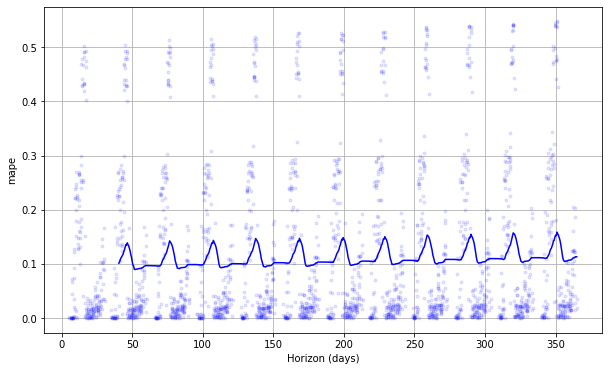

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

## References
- https://www.youtube.com/watch?v=XZhPO043lqU

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4de2e03-9eeb-40d9-be8e-7e4affb2d884' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>